## Redução de dimensionalidade

## Importação de bibliotecas

In [1]:
import numpy as np
import matplotlib
import sklearn

import matplotlib.pyplot as plt
from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import BernoulliRBM
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

## Criação da Base de Dados

In [2]:
base = datasets.load_digits()
base

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
X = np.asarray(base.data,'float32')
X.shape

(1797, 64)

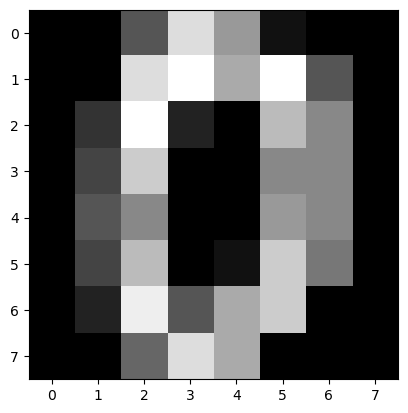

In [6]:
plt.imshow(X[0].reshape((8,8)),cmap='gray')

In [7]:
y = base.target
y

array([0, 1, 2, ..., 8, 9, 8])

In [8]:
normalizador = MinMaxScaler(feature_range=(0,1))
X = normalizador.fit_transform(X)

In [10]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X,y,test_size=0.2,random_state=0)

In [11]:
X_treinamento.shape, X_teste.shape, y_treinamento.shape, y_teste.shape

((1437, 64), (360, 64), (1437,), (360,))

In [12]:
rbm.train(base, max_epochs = 5000) 

NameError: name 'rbm' is not defined

## Criar estrutura do RBM

In [13]:
rbm = BernoulliRBM(random_state=0)
rbm.n_iter = 25
rbm.n_components = 50
naive_rbm = GaussianNB()
classificador_rbm = Pipeline(steps=[('rbm',rbm),('naive',naive_rbm)])
classificador_rbm.fit(X_treinamento,y_treinamento)

Pipeline(steps=[('rbm',
                 BernoulliRBM(n_components=50, n_iter=25, random_state=0)),
                ('naive', GaussianNB())])

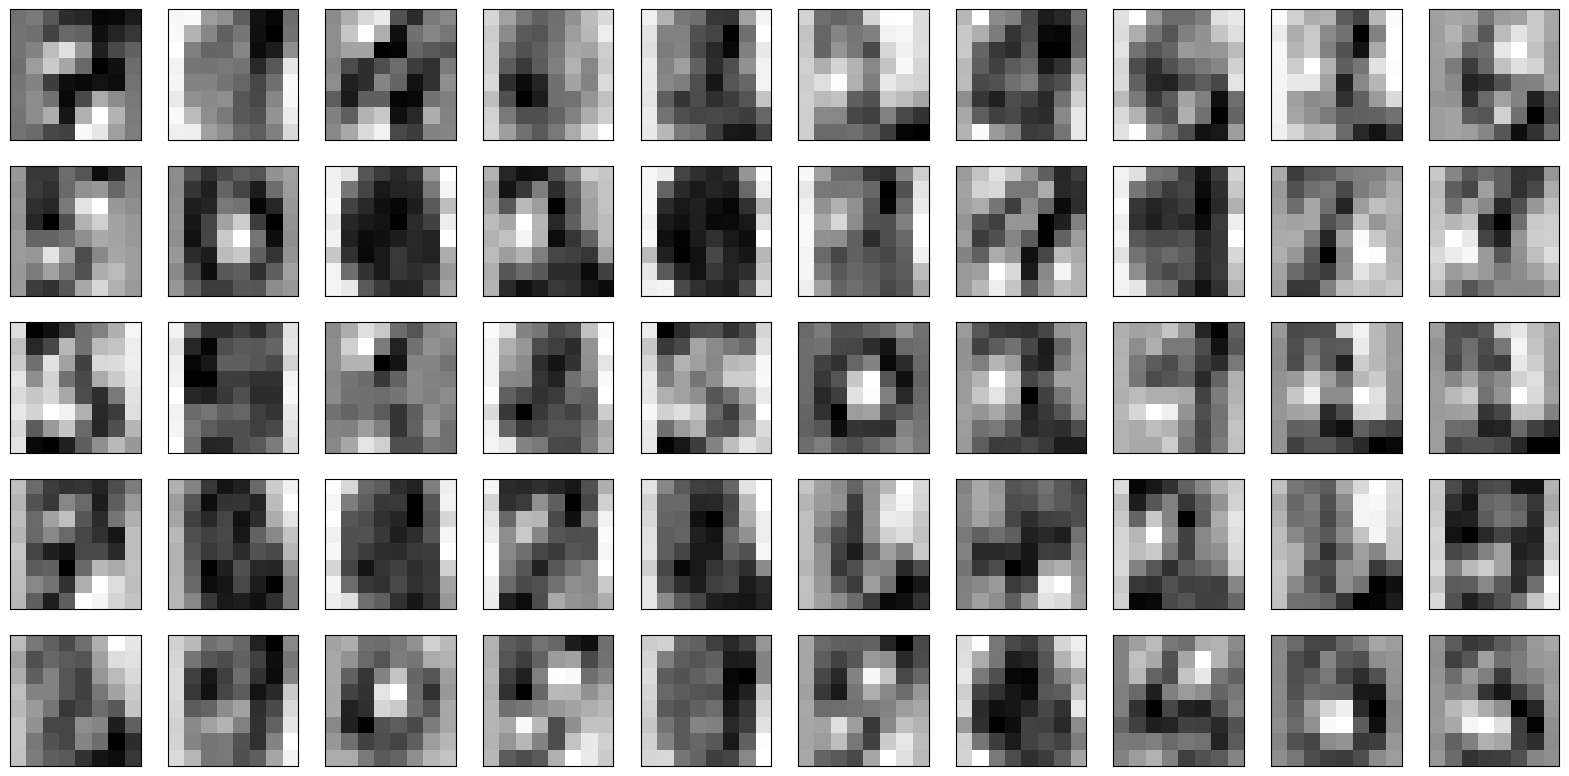

In [14]:
plt.figure(figsize=(20,20))
for i,componente in enumerate(rbm.components_):
    plt.subplot(10,10,i+1)
    plt.imshow(componente.reshape((8,8)),cmap=plt.cm.gray_r)
    plt.xticks(())
    plt.yticks(())

### Previsoes e calculo de acurácia - Redução com RBM x sem RBM

### Com RBM

In [15]:
previsores_rbm = classificador_rbm.predict(X_teste)
previsores_rbm

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       2, 4, 7, 5, 4, 3, 2, 9, 4, 7, 6, 8, 9, 4, 3, 8, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 9, 8, 6, 3, 0, 2, 3, 4, 1, 3,
       7, 6, 9, 8, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 7, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 8,
       3, 4, 8, 9, 7, 7, 8, 9, 1, 9, 2, 5, 8, 4, 6, 7, 0, 6, 8, 5, 3, 9,
       9, 5, 9, 5, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 8, 5, 9, 9, 1, 5, 3,
       6, 8, 8, 9, 7, 7, 6, 3, 6, 5, 6, 0, 8, 8, 9, 3, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 3, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 1, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 3, 2, 9, 4, 1, 1, 6, 8, 9,
       3, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 9, 2, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 8, 5, 5, 7, 5, 2, 2, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 8, 8, 2, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

In [16]:
metrics.accuracy_score(y_teste,previsores_rbm)

0.8861111111111111

### Sem RBM

In [17]:
naive_simples = GaussianNB()
naive_simples.fit(X_treinamento,y_treinamento)

GaussianNB()

In [18]:
previsoes_naive = naive_simples.predict(X_teste)
previsoes_naive

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 1, 9, 4, 3, 1, 0, 1, 1, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 5, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       8, 6, 8, 8, 8, 3, 5, 1, 2, 1, 2, 1, 9, 7, 1, 3, 6, 0, 5, 3, 7, 5,
       1, 8, 9, 9, 3, 1, 7, 7, 4, 8, 5, 1, 5, 5, 8, 5, 8, 0, 7, 1, 7, 7,
       3, 7, 8, 9, 7, 7, 8, 1, 6, 5, 8, 5, 5, 4, 1, 7, 0, 6, 8, 5, 8, 1,
       1, 5, 9, 9, 5, 7, 5, 6, 8, 8, 6, 7, 6, 1, 5, 1, 7, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 7, 7, 6, 7, 6, 5, 6, 0, 8, 8, 3, 8, 6, 1, 0, 7, 1, 6,
       3, 8, 6, 7, 4, 9, 6, 3, 0, 2, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 1, 9,
       6, 4, 7, 0, 1, 4, 6, 4, 3, 8, 0, 9, 5, 3, 1, 1, 4, 1, 1, 6, 1, 9,
       1, 4, 9, 3, 7, 6, 8, 3, 3, 1, 6, 9, 8, 6, 3, 1, 2, 0, 7, 6, 1, 1,
       8, 7, 1, 7, 1, 5, 5, 7, 5, 3, 8, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 1, 6, 8, 8, 8, 4, 6, 7, 5, 2, 1,
       7, 3, 8, 4, 6, 9, 4, 5, 7, 3, 4, 6, 2, 8, 0,

In [19]:
metrics.accuracy_score(y_teste,previsoes_naive)

0.8111111111111111